In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [239]:
reviews_data = pd.read_csv('ratings_Electronics.csv',header=None, names=['userId','productId','ratings','timestamp'])
reviews_data.head(10)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


### Exploratory Data Analysis

In [240]:
print("Number of rows in the dataset ",reviews_data.shape[0])
print("Number of columns in the dataset ", reviews_data.shape[1])

Number of rows in the dataset  7824482
Number of columns in the dataset  4


In [241]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [242]:
reviews_data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [243]:
reviews_data.isna().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [244]:
print("The number of unique users in the dataset: ", reviews_data['userId'].nunique())
print("The number of unique products in the dataset: ", reviews_data['productId'].nunique())

The number of unique users in the dataset:  4201696
The number of unique products in the dataset:  476002


In [245]:
print("The unique ratings given by users are ", reviews_data['ratings'].unique())

The unique ratings given by users are  [5. 1. 3. 2. 4.]


### Data Visualisation

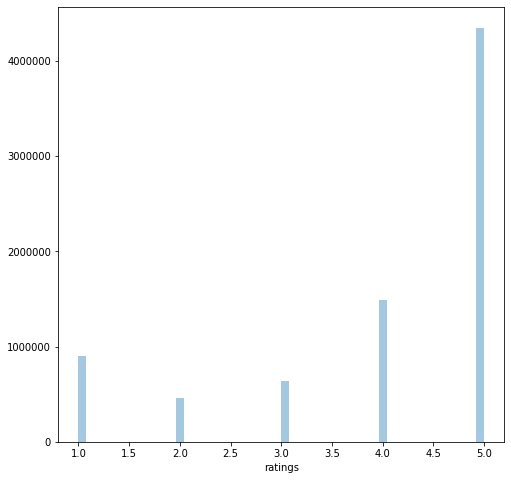

In [246]:
plt.figure(figsize=(8,8))
sns.distplot(reviews_data['ratings'], kde=False)

### Plot analysis
We see that the rating 5.0 is given 4000000 plus times. The 2.0 ratings have been given least number of times

In [247]:
reviews_data['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

## Take a subset of the dataset to make it less sparse/ denser

In [248]:
reviews_data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [249]:
reviews_data.groupby('userId').count()['ratings'].sort_values(ascending=False)[:10]

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: ratings, dtype: int64

#### Keeping the users only who has given 50 or more number of ratings

In [250]:
counts = reviews_data['userId'].value_counts()

In [251]:
df = reviews_data[reviews_data['userId'].isin(counts[counts >= 50].index)]

In [252]:
df.shape

(125871, 4)

In [253]:
print("The number of unique users in the final dataset: ", df['userId'].nunique())
print("The number of unique products in the final dataset: ", df['productId'].nunique())
print("The unique ratings given by users are ", df['ratings'].unique())

The number of unique users in the final dataset:  1540
The number of unique products in the final dataset:  48190
The unique ratings given by users are  [5. 3. 1. 4. 2.]


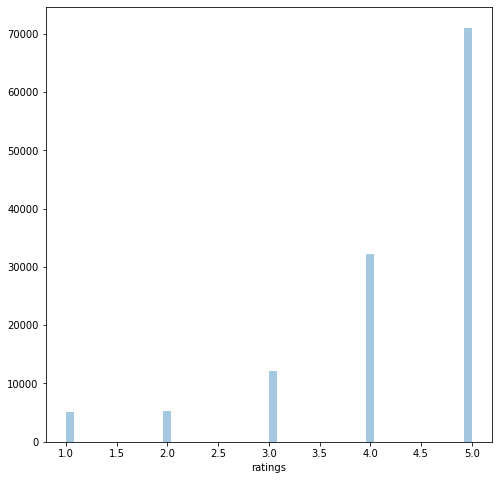

In [254]:
plt.figure(figsize=(8,8))
sns.distplot(df['ratings'], kde=False)

In [255]:
df['ratings'].value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: ratings, dtype: int64

### Calculate density of the rating matrix

In [256]:
pivot_table = df.pivot(index='userId',columns='productId',values='ratings').fillna(0)

In [257]:
print("The shape of ratings matrix is ", pivot_table.shape)

The shape of ratings matrix is  (1540, 48190)


In [258]:
pivot_table.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
given_num_of_ratings = np.count_nonzero(pivot_table)
print("The given number of ratings = ", given_num_of_ratings)
possible_num_of_ratings = pivot_table.shape[0] * pivot_table.shape[1]
print("The total number of ratings = ", possible_num_of_ratings)
density = given_num_of_ratings / possible_num_of_ratings
sparsity = 1 - density
print("Density = {:4.2f}%".format(density * 100))
print("Sparsity = {:4.2f}%".format(sparsity * 100))

The given number of ratings =  125871
The total number of ratings =  74212600
Density = 0.17%
Sparsity = 99.83%


In [260]:
np.count_nonzero(pivot_table)

125871

## Popularity Based Recommender System

In [261]:
df.groupby('productId').mean().head()

,ratings,timestamp
productId,,
0594451647,5.000000,1.390176e+09
0594481813,3.000000,1.377907e+09
0970407998,2.500000,1.300709e+09
0972683275,4.750000,1.337256e+09
1400501466,3.333333,1.342138e+09


In [262]:
df.groupby('productId').count()['ratings'].sort_values(ascending = False).head(10)

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
Name: ratings, dtype: int64

In [263]:
ratings_mean_count = pd.DataFrame(df.groupby('productId')['ratings'].mean())

In [264]:
ratings_mean_count['ratings_count'] = pd.DataFrame(df.groupby('productId')['ratings'].count())

In [266]:
print("The popularity based recommendations are as follows:")
ratings_mean_count.groupby('productId').mean().sort_values(ascending=False, by='ratings_count').head(10)

The popularity based recommendations are as follows:


,ratings,ratings_count
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
B008DWCRQW,4.094891,137
B00829THK0,4.416058,137
B002R5AM7C,4.125000,128
B004CLYEDC,4.669492,118


## Collaborative Filtering
### Model - Based Collaborative Filtering - SVD

In [267]:
pivot_table.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
U, sigma, vT = svds(pivot_table, k=50)

In [269]:
sigma = np.diag(sigma)

In [270]:
user_predicted_ratings = U.dot(sigma.dot(vT))

In [271]:
recommender = pd.DataFrame(user_predicted_ratings, columns=pivot_table.columns, index=pivot_table.index)

In [272]:
recommender.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
A100WO06OQR8BQ,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
A105S56ODHGJEK,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
A105TOJ6LTVMBG,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
A10AFVU66A79Y1,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [274]:
def recommended_items(user_id, recommender, n=5):
        sorted_user_ratings = pivot_table.loc[user_id].sort_values(ascending=False)
        predicted_user_ratings = recommender.loc[user_id].sort_values(ascending=False)
        temp = pd.concat([sorted_user_ratings, predicted_user_ratings],axis=1)
        temp.index.name = 'Recommended Items'
        temp.columns = ['user_ratings', 'user_predictions']
        temp = temp.loc[temp.user_ratings == 0]
        temp = temp.sort_values('user_predictions',ascending = False)
        return temp.head(n)

In [275]:
recommended_items('A10AFVU66A79Y1',recommender, 10)

,user_ratings,user_predictions
Recommended Items,,
B0088CJT4U,0.0,0.745958
B003ES5ZUU,0.0,0.633890
B008DWCRQW,0.0,0.618328
B002SQK2F2,0.0,0.535753
B0015DYMVO,0.0,0.521440
B009SYZ8OC,0.0,0.507312
B002WE6D44,0.0,0.478432
B0034CL2ZI,0.0,0.452786
B008H9BXMK,0.0,0.449390


In [276]:
rmse_df = pd.concat([train.mean(), recommender.mean()], axis=1)
columns = ['avg_actual', 'avg_predicted']
rmse_df.columns = columns
rmse_df.head()

,avg_actual,avg_predicted
productId,,
0594451647,0.004058,0.001953
0594481813,0.002435,0.002875
0970407998,0.004058,0.003355
0972683275,0.011364,0.010343
1400501466,0.012175,0.004871


In [277]:
RMSE = (((rmse_df['avg_actual'] - rmse_df['avg_predicted']) ** 2).mean() ** 0.5)
print("RMSE with SVD model is {}".format(RMSE))

RMSE with SVD model is 0.0036116523217888494


#### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products

In [278]:
recommended_items('A2AY4YUOX2N1BQ', recommender, 5)

,user_ratings,user_predictions
Recommended Items,,
B00829TIA4,0.0,0.787201
B0034CL2ZI,0.0,0.771849
B00004ZCJE,0.0,0.707015
B0041MY32Y,0.0,0.606489
B004CLYEH8,0.0,0.504721
